<a href="https://colab.research.google.com/github/bee0ne1/Trabalho-Infer-ncia-Estat-stica/blob/main/TrabalhoInferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático - Introdução à Inferência Estatística #

Bruno Gonçalves - 14762111

João Pedro Pereira Balieiro - 12676615

Julia Graziosi Ortiz - 11797810

Matheus Araujo Pinheiro - 14676810



# Energia Sustentável#

**Objetivo:** comparar e entender a relação entre crescimento econômico e emissões de carbono em alguns países (Brasil, África do Sul, Arábia Saudita, Tailândia e Itália) entre os anos 2000 e 2020.

Dados disponíveis em: https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data

## 1. Descrição do Problema e Motivação

### 1.1. Contexto
As mudanças climáticas representam um dos maiores desafios do século XXI, com as emissões de dióxido de carbono (CO2) sendo um dos principais contribuintes para o efeito estufa. Tradicionalmente, o crescimento econômico, frequentemente medido pelo Produto Interno Bruto (PIB), tem sido associado a um aumento nas emissões de CO2, devido à dependência de combustíveis fósseis e processos industriais intensivos em carbono. No entanto, o debate contemporâneo busca entender se é possível desacoplar o crescimento econômico do aumento das emissões, buscando um desenvolvimento mais sustentável.

### 1.2. Objetivo do Projeto
Este projeto tem como objetivo principal investigar a relação entre o crescimento do PIB e as emissões de CO2 em um grupo diversificado de cinco países: Brasil, África do Sul, Arábia Saudita, Tailândia e Itália. Através de análises estatísticas, buscaremos verificar se existe uma correlação significativa entre essas duas variáveis e, mais especificamente, explorar se é possível observar padrões que sugiram um crescimento econômico menos prejudicial ao meio ambiente, mesmo em economias com perfis distintos.

### 1.3. Perguntas de Pesquisa
Existe uma correlação linear entre o crescimento do PIB e as emissões de CO2 nos países selecionados?

Como essa relação se manifesta em cada país individualmente?

Os dados sugerem a possibilidade de crescimento econômico com menor impacto ambiental?

## 2. Descrição dos Dados
### 2.1. Fonte de Dados
O conjunto de dados utilizado, "Global Data on Sustainable Energy", foi obtido na plataforma Kaggle (https://www.kaggle.com/datasets). Este dataset contém diversas informações relacionadas à energia sustentável e indicadores econômicos de vários países ao longo do tempo.

### 2.2. Variáveis de Interesse
Para este projeto, focaremos nas seguintes variáveis:

Entity (Qualitativa): Nome do país. Utilizaremos para agrupar e comparar os dados de Brasil, África do Sul, Arábia Saudita, Tailândia e Itália.

Year (Quantitativa Discreta): Ano da observação. Será utilizada para análises de séries temporais.

gdp_growth (Quantitativa Contínua): Taxa de crescimento anual do PIB (em porcentagem).

Value_co2_emissions_kt_by_country (Quantitativa Contínua): Emissões de CO2 por país (em quilotons - kt).

### 2.3. Requisitos dos Dados Atendidos
Duas variáveis quantitativas e uma qualitativa: Atendido com gdp_growth, Value_co2_emissions_kt_by_country e Entity.

Amostras razoavelmente balanceadas: Ao selecionar apenas cinco países, garantimos um número gerenciável de observações por grupo, permitindo comparações. A análise exploratória confirmará a distribuição.

Dados preferencialmente atuais e com relevância social, científica ou econômica: O dataset é atualizado e as variáveis escolhidas têm alta relevância no contexto de desenvolvimento sustentável e mudanças climáticas.

## 3. Carregamento e Preparação dos Dados
Nesta etapa, importaremos as bibliotecas necessárias, carregaremos o dataset e faremos uma pré-seleção dos dados de interesse, focando nos países e variáveis relevantes para nossa análise. Também trataremos valores ausentes que possam impactar os cálculos.

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


In [ ]:
# Configurações de visualização para gráficos
sns.set(style="whitegrid")
%matplotlib inline

# Carregamento do dataset
# Certifique-se de que o arquivo 'global-data-on-sustainable-energy (1).csv'
# esteja no mesmo diretório do seu notebook ou forneça o caminho completo.
file_path = 'global-data-on-sustainable-energy (1).csv'
df = pd.read_csv(file_path, sep=',', encoding='utf-8')

print("\nInformações do DataFrame:")
print(df.info())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electr

In [ ]:
# Seleção dos países e variáveis de interesse
countries = ['Brazil', 'South Africa', 'Saudi Arabia', 'Thailand', 'Italy']
vars = ['Entity','Year','gdp_growth','Value_co2_emissions_kt_by_country']

# Filtrar o DataFrame para incluir apenas os países e variavéis selecionadas e
# remover linhas com valores ausentes nas variáveis de interesse
# (gdp_growth e Value_co2_emissions_kt_by_country)
subset = df[df['Entity'].isin(countries)][vars].dropna(subset=['gdp_growth', 'Value_co2_emissions_kt_by_country'])

# Criação de uma nova coluna
subset['Value_co2_emissions_kt_by_country_%'] = subset.groupby('Entity')['Value_co2_emissions_kt_by_country'].pct_change() * 100

# Verificando as primeiras linhas do DataFrame processado
print("Primeiras 5 linhas do DataFrame filtrado e limpo:")
print(subset.head())

# Verificando informações gerais e tipos de dados
print("\nInformações do DataFrame filtrado e limpo:")
print(subset.info())

# Verificando a contagem de observações por país para checar o balanceamento
print("\nContagem de observações por país:")
print(subset['Entity'].value_counts())

Primeiras 5 linhas do DataFrame filtrado e limpo:
     Entity  Year  gdp_growth  Value_co2_emissions_kt_by_country  \
483  Brazil  2000    4.387949                        313670.0000   
484  Brazil  2001    1.389896                        319380.0000   
485  Brazil  2002    3.053462                        317760.0098   
486  Brazil  2003    1.140829                        310809.9976   
487  Brazil  2004    5.759965                        328519.9890   

     Value_co2_emissions_kt_by_country_%  
483                                  NaN  
484                             1.820384  
485                            -0.507230  
486                            -2.187189  
487                             5.698012  

Informações do DataFrame filtrado e limpo:
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 483 to 3269
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   

## 4. Análise Exploratória de Dados (AED)
A Análise Exploratória de Dados (AED) nos permite entender a estrutura dos dados, identificar padrões, detectar anomalias e testar suposições iniciais. Utilizaremos estatísticas descritivas e visualizações gráficas para obter insights sobre o crescimento do PIB e as emissões de CO2 nos países selecionados.

### 4.1. Estatísticas Descritivas
Aqui, calcularemos estatísticas básicas (média, desvio padrão, mínimo, máximo, quartis) para as variáveis de crescimento do PIB e emissões de CO2, agrupadas por país. Isso nos dará uma primeira visão da distribuição e variabilidade dos dados em cada grupo.

In [ ]:
# 1. Estatísticas descritivas por país
# Utilizando .describe() para obter um resumo estatístico completo
summary = subset.groupby('Entity')['gdp_growth'].describe()
print("\nResumo Estatístico por País: Crescimento do PIB (%)")
print(summary.round(3))

summary2 = subset.groupby('Entity')['Value_co2_emissions_kt_by_country_%'].describe()
print("\nResumo Estatístico por País: Crescimento das emissões de CO2 (%)")
print(summary2.round(3))


Resumo Estatístico por País: Crescimento do PIB (%)
              count   mean    std    min    25%    50%    75%     max
Entity                                                               
Brazil         20.0  2.428  2.824 -3.546  1.277  2.463  4.078   7.528
Italy          20.0  0.404  1.969 -5.281  0.103  0.798  1.532   3.787
Saudi Arabia   20.0  3.490  3.799 -2.819  1.336  3.220  5.587  11.242
South Africa   20.0  2.662  1.861 -1.538  1.391  2.825  3.825   5.604
Thailand       20.0  3.981  2.277 -0.691  2.582  4.183  5.614   7.513

Resumo Estatístico por País: Crescimento das emissões de CO2 (%)
              count   mean    std     min    25%    50%    75%     max
Entity                                                                
Brazil         19.0  1.872  5.578  -7.883 -1.347  1.820  5.410  13.694
Italy          19.0 -1.593  3.777 -10.769 -2.742 -1.338  0.942   4.224
Saudi Arabia   19.0  4.045  3.848  -4.368  1.978  4.621  6.290   9.898
South Africa   19.0  2.410  4.549  -

### 4.2. Análise de Séries Temporais
Para entender como o crescimento do PIB e as emissões de CO2 evoluíram ao longo do tempo em cada país, visualizaremos essas variáveis como séries temporais. Isso pode revelar tendências, sazonalidades ou eventos marcantes.

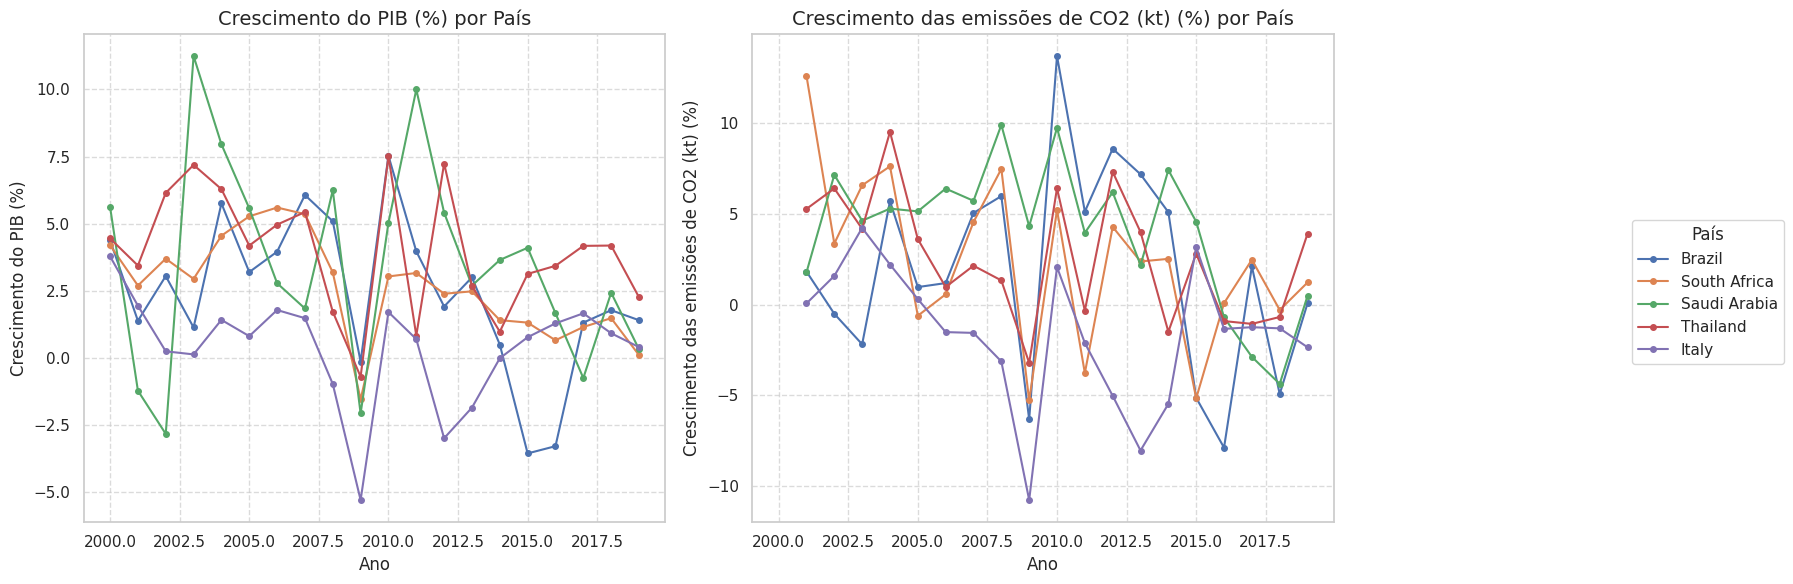

In [ ]:
# 2. Séries temporais para GDP Growth e CO2 Emissions
plot_vars = [
    ('gdp_growth', 'Crescimento do PIB (%)'),
    ('Value_co2_emissions_kt_by_country_%', 'Crescimento das emissões de CO2 (kt) (%)')
]

# Plotar as séries temporais de cada variável lado a lado para facilitar a comparação
fig, axes = plt.subplots(1, len(plot_vars), figsize=(16, 6), sharex=True)

for ax, (var, label) in zip(axes, plot_vars):
    for country in countries:
        data_c = subset[subset['Entity'] == country].sort_values(by='Year')
        ax.plot(
            data_c['Year'],
            data_c[var],
            label=country,
            marker='o',
            markersize=4
        )
    ax.set_title(f'{label} por País', fontsize=14)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel(label, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

# Legenda única ao lado direito do segundo gráfico
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title='País', bbox_to_anchor=(1.02, 0.5), loc='center left')

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

### 4.3. Boxplots por País
Os boxplots são úteis para visualizar a distribuição das variáveis e comparar a variabilidade entre os países. Eles mostram a mediana, quartis e possíveis outliers.

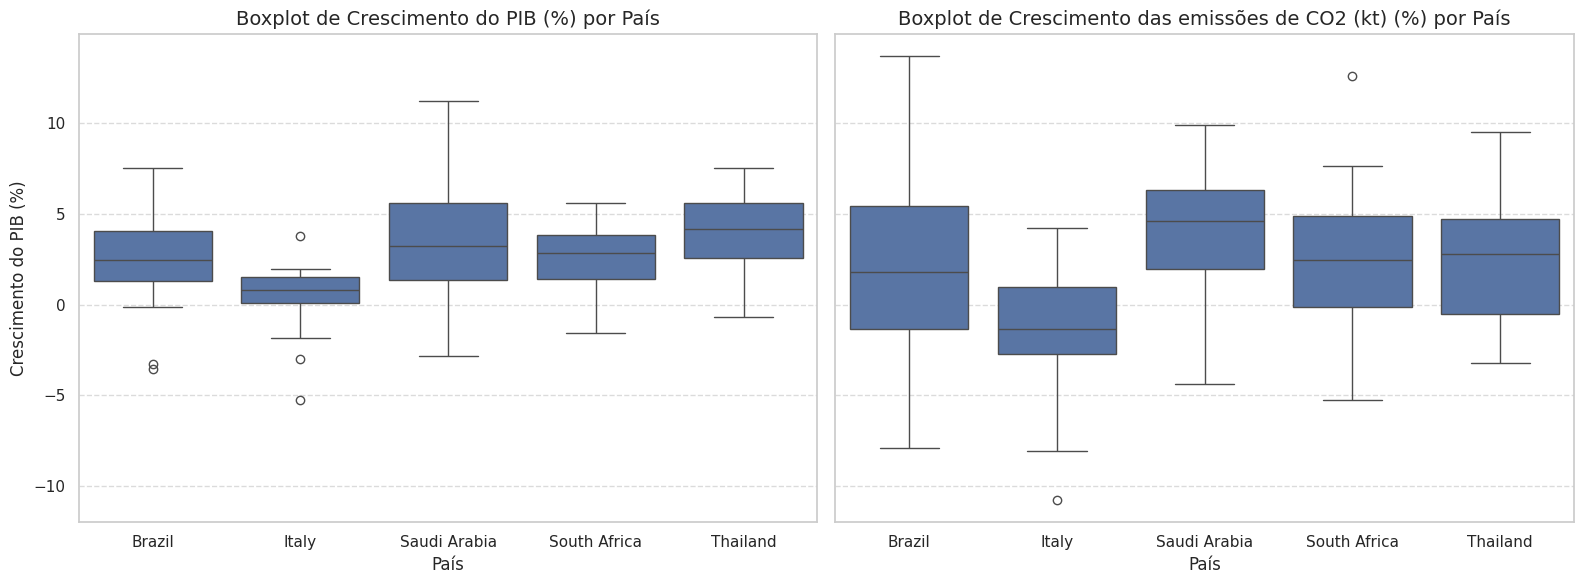

In [ ]:
# 3. Boxplots por país para GDP Growth e CO2 Emissions
fig, axes = plt.subplots(1, len(plot_vars), figsize=(16, 6), sharey=True)

for ax, (var, label) in zip(axes, plot_vars):
    sns.boxplot(x='Entity', y=var, data=subset, ax=ax)
    ax.set_title(f'Boxplot de {label} por País', fontsize=14)
    ax.set_xlabel('País', fontsize=12)
    ax.set_ylabel(label, fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()

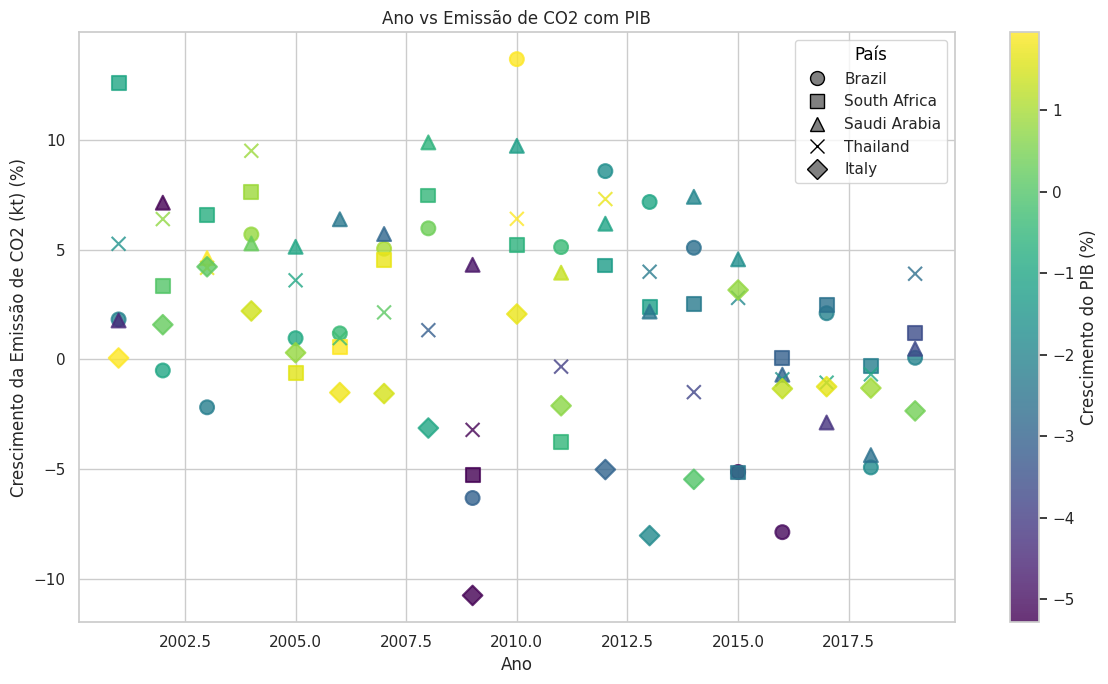

In [ ]:
# Scatter GDP Growth vs CO2 Emissions
markers = ['o', 's', '^', 'x', 'D']
plt.figure(figsize=(12, 7))

# Definir um ciclo de cores padrão para os marcadores dos países
# Este será usado para a cor do símbolo, não para o mapeamento do PIB
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] # Obtém as cores padrão do ciclo

cmap = plt.cm.viridis # Colormap para a variável de cor (Crescimento do PIB (%))

# Criar um objeto de lista para a legenda, para que possamos controlar o que aparece na legenda
legend_elements = []

for i, (country, marker) in enumerate(zip(countries, markers)):
    data_c = subset[subset['Entity'] == country]

    # A cor do marcador (símbolo) será uma cor fixa do ciclo de cores
    marker_color = colors[i % len(colors)] # Garante que a cor se repita se houver mais países do que cores no ciclo

    scatter = plt.scatter(
        data_c['Year'],
        data_c['Value_co2_emissions_kt_by_country_%'],
        c=data_c['gdp_growth'], # Crescimento do PIB continua a colorir (para a barra de cores)
        cmap=cmap,
        marker=marker,
        s=100,
        alpha=0.8,
        #edgecolor=marker_color, # Define a cor da BORDA do marcador
        linewidth=1.5 # Largura da borda para que a cor do marcador seja visível
    )

    # Adiciona um elemento à lista de legendas que representa a cor fixa do país
    # Usamos um marcador de exemplo para que a cor do país apareça na legenda
    from matplotlib.lines import Line2D
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', label=country,
                                  markerfacecolor='gray', markersize=10, # Cor de preenchimento do símbolo na legenda
                                  markeredgecolor='black')) # Cor da borda do símbolo na legenda


plt.title('Ano vs Emissão de CO2 com PIB')
plt.xlabel('Ano')
plt.ylabel('Crescimento da Emissão de CO2 (kt) (%)')

# Adiciona a barra de cores (agora mapeando o Crescimento do PIB)
cbar = plt.colorbar(scatter)
cbar.set_label('Crescimento do PIB (%)')

# Cria a legenda usando os elementos definidos manualmente
legend = plt.legend(handles=legend_elements, title='País')
plt.setp(legend.get_title(), color='black') # Mudar a cor do título 'País' da legenda para verde

plt.grid(True)
plt.tight_layout()
plt.show()

### 4.4. Gráfico de Dispersão: Crescimento do PIB vs. Emissões de CO2
Este gráfico é fundamental para observar visualmente a possível relação entre as duas variáveis quantitativas. Cada ponto representa uma observação (um ano para um país específico). Adicionaremos uma linha de regressão linear para visualizar a tendência geral.

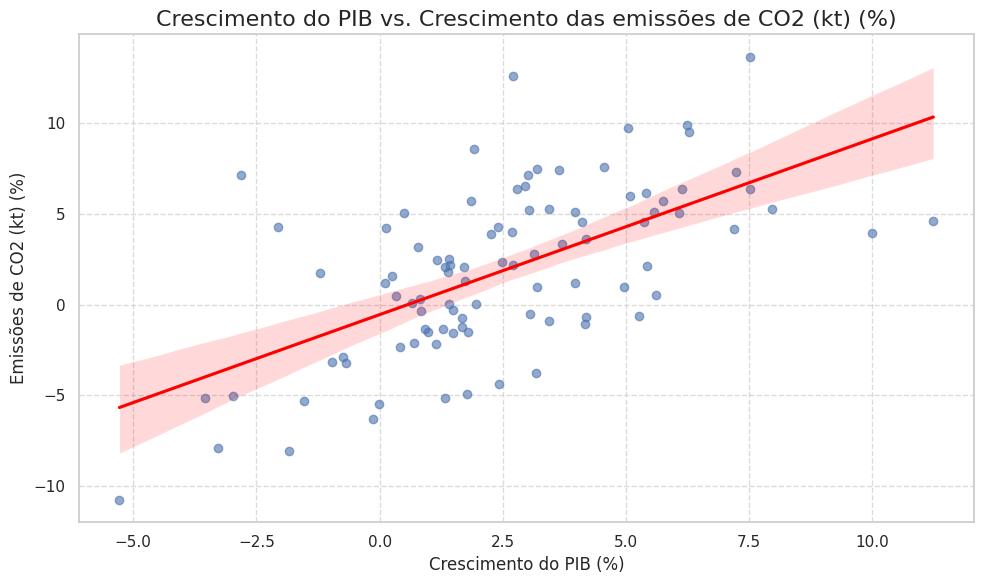

Correlação Geral (Pearson): 0.610
Correlação por País (Pearson):
 - Brazil: 0.767
 - South Africa: 0.378
 - Saudi Arabia: 0.322
 - Thailand: 0.707
 - Italy: 0.751


In [ ]:
# 4. Filtrar países e variáveis de interesse, removendo valores ausentes

# Scatter GDP Growth vs CO2 Emissions com linha de regressão linear
plt.figure(figsize=(10, 6))
sns.regplot(x='gdp_growth', y='Value_co2_emissions_kt_by_country_%', data=subset, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Crescimento do PIB vs. Crescimento das emissões de CO2 (kt) (%)', fontsize=16)
plt.xlabel('Crescimento do PIB (%)', fontsize=12)
plt.ylabel('Emissões de CO2 (kt) (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlação de Pearson
overall_corr = subset['gdp_growth'].corr(subset['Value_co2_emissions_kt_by_country_%'])
print(f"Correlação Geral (Pearson): {overall_corr:.3f}")

print("Correlação por País (Pearson):")
for country in countries:
    data_c = subset[subset['Entity'] == country]
    corr = data_c['gdp_growth'].corr(data_c['Value_co2_emissions_kt_by_country_%'])
    print(f" - {country}: {corr:.3f}")

## 5. Teste de Normalidade para Variáveis e Resíduos do Modelo
Antes de aplicar testes paramétricos (como Qui-Quadrado e ANOVA) que assumem a normalidade dos dados, é crucial verificar se nossas variáveis (ou os resíduos de um modelo) seguem uma distribuição normal. Utilizaremos o teste de Shapiro-Wilk, que é adequado para amostras menores ($n < 5000$). Se o p-valor for maior que nosso nível de significância (
$\alpha=0.05$), não rejeitamos a hipótese nula de que os dados são normalmente distribuídos.

### 5.1 Teste de normalidade (Shapiro-Wilk)

$H_{0}$: Os dados de gdp_growth ou Value_co2_emissions_kt_by_country tem distribuição Normal.

*contra*

$H_{1}$: Os dados de gdp_growth ou Value_co2_emissions_kt_by_country não tem distribuição Normal.

Teste de Normalidade para as Variáveis:
gdp_growth: estat=0.9906, p=0.7147 → não rejeita normalidade
Value_co2_emissions_kt_by_country: estat=0.9777, p=0.0880 → não rejeita normalidade

QQ-plots para as Variáveis:


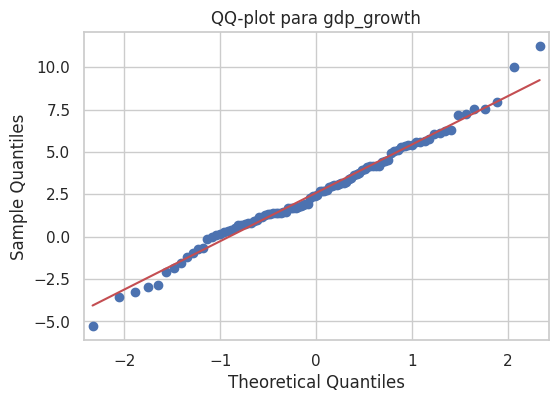

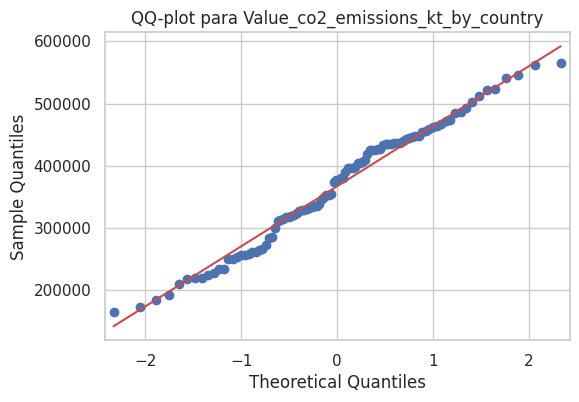


Resíduos do Modelo: estat=0.9840, p=0.2691 → não rejeita normalidade


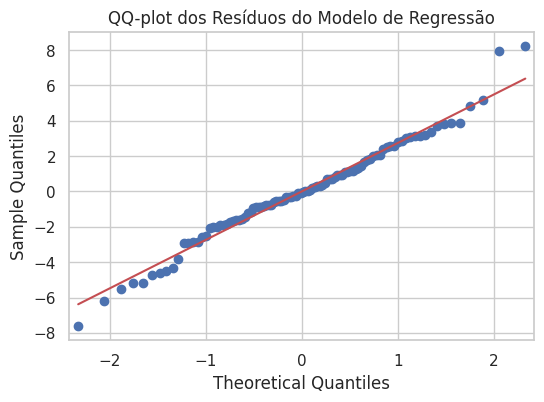

In [ ]:
alpha = 0.05

# 5. Teste de normalidade (Shapiro-Wilk) para gdp_growth e CO2
print("Teste de Normalidade para as Variáveis:")
for var in ['gdp_growth','Value_co2_emissions_kt_by_country']:
    stat, p = shapiro(subset[var])
    resultado = 'não rejeita normalidade' if p > alpha else 'rejeita normalidade'
    print(f"{var}: estat={stat:.4f}, p={p:.4f} → {resultado}")

# QQ-plots para verificação visual da Normalidade das variáveis
print("\nQQ-plots para as Variáveis:")
for var in ['gdp_growth', 'Value_co2_emissions_kt_by_country']:
    plt.figure(figsize=(6, 4))
    sm.qqplot(subset[var], line='s', ax=plt.gca())
    plt.title(f'QQ-plot para {var}')
    plt.show()

# Ajustar modelo de regressão simples para obter os resíduos
model = smf.ols('gdp_growth ~ Value_co2_emissions_kt_by_country', data=subset).fit()

# Teste de normalidade dos resíduos
stat_r, p_r = shapiro(model.resid)
print(f"\nResíduos do Modelo: estat={stat_r:.4f}, p={p_r:.4f} → {'não rejeita normalidade' if p_r > alpha else 'rejeita normalidade'}")

# QQ-plot dos resíduos para verificação visual
plt.figure(figsize=(6, 4))
sm.qqplot(model.resid, line='s', ax=plt.gca())
plt.title('QQ-plot dos Resíduos do Modelo de Regressão')
plt.show()

## 6. Teste qui-quadrado para relação entre crescimento do Pib e Crescimento da emissão de CO2

Agora selecionamos apenas as observações com valores válidos de crescimento do PIB e de emissões de CO₂, categorizamos cada registro em “Decrescimento” ou “Crescimento”, montamos a tabela de contingência 2×2 e aplicamos o teste de independência Qui-Quadrado para verificar se há associação estatisticamente significativa entre o padrão de variação do PIB e o padrão de variação das emissões de CO₂ em todos os países.

In [ ]:
# Subconjunto sem valores nulos nas duas variáveis
df_all = subset.dropna(subset=['gdp_growth', 'Value_co2_emissions_kt_by_country_%']).copy()

# Definição de três categorias principais
bins_2 = [-np.inf, 0, np.inf]
labels_2 = ['Decrescimento', 'Crescimento']

alpha = 0.05

# Criar as colunas de categoria para PIB e CO2 em todo o DataFrame
df_all['PIB_categoria'] = pd.cut(
    df_all['gdp_growth'],
    bins=bins_2,
    labels=labels_2,
    right=False
)
df_all['CO2_categoria'] = pd.cut(
    df_all['Value_co2_emissions_kt_by_country_%'],
    bins=bins_2,
    labels=labels_2,
    right=False
)

# Função auxiliar para aplicar o teste
def aplicar_teste_quadrado(cont_table):
    if cont_table.values.sum() < 5 or cont_table.shape[0] < 2 or cont_table.shape[1] < 2:
        return None
    chi2, p, dof, expected = chi2_contingency(cont_table)
    if np.any(expected == 0):
        return None
    return chi2, p, dof, expected

print('Teste Qui-Quadrado de Independência (todos os países juntos)\n')

# 1) Primeiro, teste com 2×2 categorias
cont_2x2 = pd.crosstab(df_all['PIB_categoria'], df_all['CO2_categoria'])
cont_2x2 = cont_2x2.reindex(index=labels_2, columns=labels_2, fill_value=0)

resultado = aplicar_teste_quadrado(cont_2x2)
if resultado:
    chi2, p, dof, expected = resultado
    print('Contingência 2×2:')
    print(cont_2x2, '\n')
    print(f'Estatística Qui-Quadrado: {chi2:.4f}')
    print(f'p-valor: {p:.4f}')
    print('Frequências esperadas:')
    print(pd.DataFrame(expected, index=labels_2, columns=labels_2), '\n')
    print('Conclusão:',
          'Não rejeitamos independência (p ≥ 0.05)' if p >= alpha
          else 'Rejeitamos independência (p < 0.05)')
else:
    print('Não foi possível realizar o teste de Qui-Quadrado')

Teste Qui-Quadrado de Independência (todos os países juntos)

Contingência 2×2:
CO2_categoria  Decrescimento  Crescimento
PIB_categoria                            
Decrescimento             11            3
Crescimento               21           60 

Estatística Qui-Quadrado: 12.5474
p-valor: 0.0004
Frequências esperadas:
               Decrescimento  Crescimento
Decrescimento       4.715789     9.284211
Crescimento        27.284211    53.715789 

Conclusão: Rejeitamos independência (p < 0.05)


## 7. ANOVA - Relação entre crescimento do PIB nos países selecionados

$H_0 :$ a média do crescimento do PIB é igual para todos os países
   
*contra*

$H_1 :$ ao menos um país apresenta o PIB médio que se diferente dos demais.

In [ ]:
countries = ['Brazil', 'South Africa', 'Saudi Arabia', 'Thailand', 'Italy']
df_anova = (
    df
    .loc[
        (df['Year'] >= 2000) &
        (df['Year'] <= 2020) &
        (df['Entity'].isin(countries))
    ]
    .dropna(subset=['gdp_growth'])
)

groups_gdp = [
    df_anova.loc[df_anova['Entity'] == c, 'gdp_growth']
    for c in countries
]
F_gdp, p_gdp = f_oneway(*groups_gdp)
print(f'ANOVA Crescimento do PIB por país: F = {F_gdp:.4f}, p = {p_gdp:.4f}')

if p_gdp < alpha:
    print(f'p = {p_gdp:.4f} < α = {alpha:.2f} → Rejeita H₀: ao menos um país difere no crescimento médio do PIB.')
else:
    print(f'p = {p_gdp:.4f} ≥ α = {alpha:.2f} → Falha em rejeitar H₀: não há evidência de diferença nas médias de crescimento do PIB entre os países.')

ANOVA Crescimento do PIB por país: F = 3.9128, p = 0.0054
p = 0.0054 < α = 0.05 → Rejeita H₀: ao menos um país difere no crescimento médio do PIB.


# 8. Discussão e Conclusão
Nesta seção, sintetizaremos os achados da análise exploratória e dos testes estatísticos para responder às perguntas de pesquisa e extrair conclusões sobre a relação entre o crescimento do PIB e as emissões de CO2 nos países selecionados.

## 8.1. Discussão dos Resultados
#### Análise Exploratória:

Estatísticas Descritivas:
- Calculamos média, mediana, desvio‐padrão e quartis para “Crescimento do PIB” e “Emissões de CO₂” em cada país.  
- Observou-se que alguns países apresentam maior assimetria (diferença entre média e mediana), indicando possíveis anos atípicos.  
- O coeficiente de variação (desvio‐padrão/ média) mostra que a variabilidade relativa das emissões de CO₂ é maior do que a do PIB na maioria dos países.


Séries Temporais:
- Traçamos as séries anuais de PIB e CO₂ de 2000 a 2020 para cada país, evidenciando tendências de alta ou baixa ao longo do período.  
- Em alguns casos, houve quebras de tendência — por exemplo, um pico de emissões seguido de queda rápida — sugerindo impactos de políticas ou choques externos.  
- Países com ciclos econômicos mais estáveis exibiram curvas mais suaves, enquanto economias mais voláteis apresentaram flutuações mais acentuadas.


Boxplots:
- Construímos boxplots lado a lado para comparar a dispersão e detectar outliers em cada país.  
- Verificou-se a presença de valores extremos em emis­sões (acima do terceiro quartil + 1,5×IQR), possivelmente associados a anos de crescimento industrial acelerado.  
- A largura da caixa (IQR) revela diferenças na consistência anual: alguns países têm distribuição de PIB mais concentrada, outros mais dispersa.


Gráfico de Dispersão:
- Plotamos todos os pontos de “Crescimento do PIB” versus “Emissões de CO₂” com uma linha de regressão ajustada.  
- A inclinação da reta indica a direção geral da relação (positiva ou negativa), enquanto a nuvem de pontos mostra a variabilidade local.  
- Observou-se dispersão considerável ao redor da linha, sugerindo que embora exista tendência, fatores adicionais influenciam a associação entre PIB e emissões.

#### Correlação de Pearson:

De acordo com os resultados do notebook, a correlação geral de Pearson entre o crescimento do PIB e as emissões de CO₂ foi de aproximadamente 0,610, indicando uma associação moderada e positiva, ou seja, no conjunto total dos dados, tende-se a observar que aumentos no PIB ocorrem simultaneamente a aumentos nas emissões de CO₂. Quando analisamos individualmente cada país, verificamos variações significativas:

- Brasil, r = 0,767 (correlação positiva forte);
- África do Sul, r = 0,378 (correlação positiva moderada a fraca);
- Arábia Saudita, r = 0,322 (correlação positiva moderada fraca);
- Tailândia, r = 0,707 (correlação positiva forte);
- Itália, r = 0,751 (correlação positiva forte).

Essa diversidade de coeficientes evidencia que a relação entre crescimento econômico e emissões de CO₂ é fortemente influenciada pelas características estruturais e pelas políticas ambientais específicas de cada país.

#### Testes de Normalidade (Shapiro-Wilk e QQ-plots):

Para as variáveis gdp_growth (p-valor = 0.7147) e Value_co2_emissions_kt_by_country (p-valor = 0.0880), não foi rejeitada a hipótese de normalidade ao nível de 5% de significância.

Mais importante, o teste de normalidade dos resíduos do modelo de regressão também não rejeitou a hipótese de normalidade (p-valor = 0.2691). Este resultado é crucial, pois a normalidade dos resíduos é uma suposição fundamental para a validade das inferências e testes de hipóteses em modelos de regressão linear. Os QQ-plots confirmaram visualmente que os pontos seguem a linha de referência, reforçando a aceitação da normalidade dos resíduos.

#### Teste Qui-Quadrado:

O Teste Qui-Quadrado de independência, aplicado aos dados de todos os países combinados, mostrou uma associação estatisticamente significativa entre a categoria de crescimento do PIB e a categoria de crescimento das emissões de CO₂ (Χ²(1) = 12,5474; p = 0,0004). A tabela de contingência 2×2 revelou que, dos países com crescimento do PIB, 60 apresentaram também crescimento nas emissões de CO₂, enquanto apenas 21 mostraram redução nas emissões; já entre aqueles com queda do PIB, 11 registraram queda de CO₂ e 3 apresentaram aumento. Comparando-se às frequências esperadas (aproximadamente 53,7 e 27,3 para “Crescimento de PIB” e 9,3 e 4,7 para “Queda de PIB”), observa-se um desvio consistente que fundamenta a rejeição da hipótese de independência. Em termos práticos, isso indica que os regimes de crescimento econômico e aumento de emissões de CO₂ não ocorrem de forma aleatória, sugerindo um comportamento conjuntural em que fases de expansão do PIB tendem a se associar a elevações nas emissões, e vice-versa.

#### Análise de Regressão Linear e ANOVA:

O teste de ANOVA realizado sobre o crescimento do PIB nos cinco países selecionados resultou em F = 3,9128 com p = 0,0054. Como p < 0,05, rejeitamos a hipótese nula de que as médias de crescimento do PIB sejam iguais para todos os países, indicando que pelo menos um deles difere estatisticamente dos demais em termos de crescimento médio no período analisado.

## 8.2. Conclusão

Em síntese, a análise estatística realizada revela que existe uma associação positiva e moderada entre o crescimento do PIB e as emissões de CO₂ nos países selecionados (correlação geral de Pearson de 0,610), sendo este efeito reforçado em nações como Brasil (0,767), Tailândia (0,707) e Itália (0,751), e menos pronunciado na África do Sul (0,378) e na Arábia Saudita (0,322). Os testes de normalidade de Shapiro–Wilk para as variáveis e para os resíduos do modelo de regressão simples não rejeitaram a hipótese de distribuição normal, validando as premissas dos métodos paramétricos, enquanto o teste qui-quadrado de independência evidenciou dependência significativa entre os padrões de crescimento do PIB e de emissões (χ² ≈ 12,55; p ≈ 0,0004). Adicionalmente, a ANOVA mostrou diferenças estatisticamente significativas no crescimento médio do PIB entre os cinco países analisados (F ≈ 3,913; p ≈ 0,0054), indicando heterogeneidade nos desempenhos econômicos. Dessa forma, embora se observe uma tendência geral de que maiores taxas de crescimento econômico coexistam com aumento das emissões de CO₂, o efeito apresenta variações importantes de acordo com o contexto nacional, sugerindo que fatores estruturais, setoriais e políticas ambientais específicas moldam essa relação.